In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Boiotias'
raceDate = '5/3/2023'
surface = 'Gravel'
competition = 'cup'

link = 'https://www.ewrc-results.com/results/82641-rally-viotias-2023/?s='
startat, no_ss=410442, int(4)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Tsouloftas Ale,C1,7:40.90,-,84.6,1,Boiotias,5/3/2023,Gravel,cup,1
1,2,#2,Kehagias Giorg,C1,8:04.41,+23.51 + 23.51,80.5 2.17,1,Boiotias,5/3/2023,Gravel,cup,2
2,3,#5,Panteli Petros,C1,8:21.38,+40.48 + 16.97,77.8 3.74,1,Boiotias,5/3/2023,Gravel,cup,3
3,4,#6,Paradissis P.,C2,8:31.62,+50.72 + 10.24,76.2 4.68,1,Boiotias,5/3/2023,Gravel,cup,4
4,5,#101,Halivelakis A.,3 2000,8:51.11,+1:10.21 + 19.49,73.4 6.48,1,Boiotias,5/3/2023,Gravel,cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,43,#35,Papadopoulos I,C5 F2,8:13.06,+2:42.27 + 18.22,80.2 14.8,4,Boiotias,5/3/2023,Gravel,cup,43
43,44,#32,Kokkinos Steli,C4 F2,8:17.72,+2:46.93 + 4.66,79.4 15.2,4,Boiotias,5/3/2023,Gravel,cup,44
44,45,#121,Vassilopoulos,2 2000,8:20.95,+2:50.16 + 3.23,78.9 15.5,4,Boiotias,5/3/2023,Gravel,cup,45
45,46,#120,Mathios Nikola,3 -1300,10:33.05,+5:02.26 + 2:12.10,62.4 27.5,4,Boiotias,5/3/2023,Gravel,cup,46


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsouloftas Ale,C1,1,Boiotias,5/3/2023,Gravel,cup,1,460.90
1,Kehagias Giorg,C1,1,Boiotias,5/3/2023,Gravel,cup,2,484.41
2,Panteli Petros,C1,1,Boiotias,5/3/2023,Gravel,cup,3,501.38
3,Paradissis P.,C2,1,Boiotias,5/3/2023,Gravel,cup,4,511.62
4,Halivelakis A.,3 2000,1,Boiotias,5/3/2023,Gravel,cup,5,531.11
...,...,...,...,...,...,...,...,...,...
42,Papadopoulos I,C5 F2,4,Boiotias,5/3/2023,Gravel,cup,43,493.06
43,Kokkinos Steli,C4 F2,4,Boiotias,5/3/2023,Gravel,cup,44,497.72
44,Vassilopoulos,2 2000,4,Boiotias,5/3/2023,Gravel,cup,45,500.95
45,Mathios Nikola,3 -1300,4,Boiotias,5/3/2023,Gravel,cup,46,633.05


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race     ss          
Boiotias 1     460.90
         2     325.78
         3     448.75
         4     330.79

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Boiotias,5/3/2023,Gravel,cup,1,460.90,460.90,0.00,0.000000,01
1,Kehagias Giorg,C1,1,Boiotias,5/3/2023,Gravel,cup,2,484.41,460.90,23.51,5.100890,01
2,Panteli Petros,C1,1,Boiotias,5/3/2023,Gravel,cup,3,501.38,460.90,40.48,8.782816,01
3,Paradissis P.,C2,1,Boiotias,5/3/2023,Gravel,cup,4,511.62,460.90,50.72,11.004556,01
4,Halivelakis A.,3 2000,1,Boiotias,5/3/2023,Gravel,cup,5,531.11,460.90,70.21,15.233239,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Papadopoulos I,C5 F2,4,Boiotias,5/3/2023,Gravel,cup,43,493.06,330.79,162.27,49.055292,04
200,Kokkinos Steli,C4 F2,4,Boiotias,5/3/2023,Gravel,cup,44,497.72,330.79,166.93,50.464041,04
201,Vassilopoulos,2 2000,4,Boiotias,5/3/2023,Gravel,cup,45,500.95,330.79,170.16,51.440491,04
202,Mathios Nikola,3 -1300,4,Boiotias,5/3/2023,Gravel,cup,46,633.05,330.79,302.26,91.375193,04


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('C1')]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Boiotias,5/3/2023,Gravel,cup,1,460.90,460.90,0.00,0.000000,01
1,Kehagias Giorg,C1,1,Boiotias,5/3/2023,Gravel,cup,2,484.41,460.90,23.51,5.100890,01
2,Panteli Petros,C1,1,Boiotias,5/3/2023,Gravel,cup,3,501.38,460.90,40.48,8.782816,01
6,Chatzimarkos P,C1,1,Boiotias,5/3/2023,Gravel,cup,7,538.36,460.90,77.46,16.806249,01
54,Velanis Vassil,C1,1,Boiotias,5/3/2023,Gravel,cup,55,733.31,460.90,272.41,59.103927,01
57,Tsouloftas Ale,C1,2,Boiotias,5/3/2023,Gravel,cup,1,325.78,325.78,0.00,0.000000,02
58,Kehagias Giorg,C1,2,Boiotias,5/3/2023,Gravel,cup,2,336.61,325.78,10.83,3.324329,02
59,Chatzimarkos P,C1,2,Boiotias,5/3/2023,Gravel,cup,3,348.87,325.78,23.09,7.087605,02
60,Panteli Petros,C1,2,Boiotias,5/3/2023,Gravel,cup,4,359.46,325.78,33.68,10.338265,02
108,Kehagias Giorg,C1,3,Boiotias,5/3/2023,Gravel,cup,1,448.75,448.75,0.00,0.000000,03


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Boiotias                      
SS.                  01     02      03     04
Crew                                         
Chatzimarkos P    77.46  23.09  420.24  10.27
Kehagias Giorg    23.51  10.83    0.00   0.00
Panteli Petros    40.48  33.68   27.67  22.79
Tsouloftas Ale     0.00   0.00     NaN    NaN
Velanis Vassil   272.41    NaN     NaN    NaN

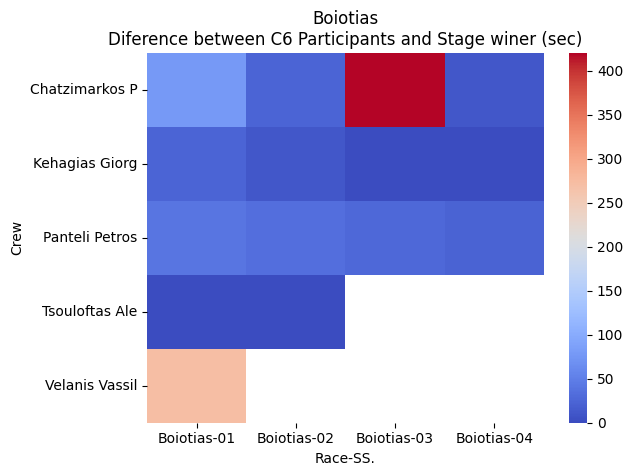

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

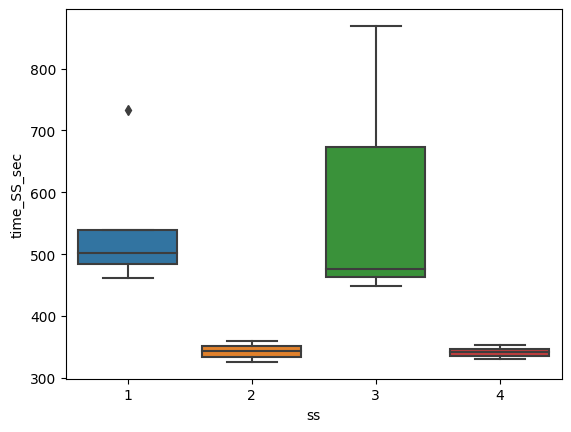

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

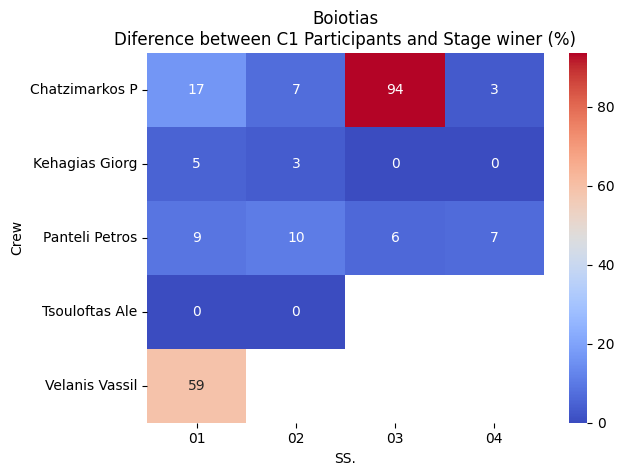

In [22]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")